In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# show actions (dividends, splits)
data.actions
data.dividends
data.splits

# show financials
data.financials
data.quarterly_financials

# show holders
data.major_holders
data.institutional_holders

# show balance sheet
data.balance_sheet
data.quarterly_balance_sheet

# show cashflow
data.cashflow
data.quarterly_cashflow

# show earnings заработок, Revenue - прибыль
data.earnings
data.quarterly_earnings

# show sustainability устойчивость
data.sustainability

data.recommendations

In [3]:
company_name = "zyxi"
data = yf.Ticker( company_name.upper() )
#  period="3d"
# hist = data.history( start="2021-07-28", end ="2021-08-01" , interval = "5m" )

In [ ]:
hist.index = pd.to_datetime( hist.index, utc=True )
hist.shape

In [4]:
info = data.info

In [6]:
info

{'zip': '80112',
 'sector': 'Healthcare',
 'fullTimeEmployees': 768,
 'longBusinessSummary': 'Zynex, Inc., through its subsidiaries, designs, manufactures, and markets medical devices to treat chronic and acute pain; and activate and exercise muscles for rehabilitative purposes with electrical stimulation. It offers NexWave, a dual channel, multi-modality interferential current, transcutaneous electrical nerve stimulation (TENS), and neuromuscular electrical stimulation (NMES) device; NeuroMove, an electromyography triggered electrical stimulation device; InWave, an electrical stimulation product for the treatment of female urinary incontinence; and E-Wave, an NMES device. The company also supplies electrodes for the delivery of electrical current to the body, and batteries for use in electrotherapy products; and distributes Comfortrac/Saunders for cervical traction, JetStream for hot/cold therapy, and LSO Back Braces for lumbar support. In addition, it offers CM-1500, a blood volume m

In [5]:
info.keys()

dict_keys(['zip', 'sector', 'fullTimeEmployees', 'longBusinessSummary', 'city', 'phone', 'state', 'country', 'companyOfficers', 'website', 'maxAge', 'address1', 'industry', 'ebitdaMargins', 'profitMargins', 'grossMargins', 'operatingCashflow', 'revenueGrowth', 'operatingMargins', 'ebitda', 'targetLowPrice', 'recommendationKey', 'grossProfits', 'freeCashflow', 'targetMedianPrice', 'currentPrice', 'earningsGrowth', 'currentRatio', 'returnOnAssets', 'numberOfAnalystOpinions', 'targetMeanPrice', 'debtToEquity', 'returnOnEquity', 'targetHighPrice', 'totalCash', 'totalDebt', 'totalRevenue', 'totalCashPerShare', 'financialCurrency', 'revenuePerShare', 'quickRatio', 'recommendationMean', 'exchange', 'shortName', 'longName', 'exchangeTimezoneName', 'exchangeTimezoneShortName', 'isEsgPopulated', 'gmtOffSetMilliseconds', 'quoteType', 'symbol', 'messageBoardId', 'market', 'annualHoldingsTurnover', 'enterpriseToRevenue', 'beta3Year', 'enterpriseToEbitda', '52WeekChange', 'morningStarRiskRating', 'f

In [61]:
info['longBusinessSummary']

'Zynex, Inc., through its subsidiaries, designs, manufactures, and markets medical devices to treat chronic and acute pain; and activate and exercise muscles for rehabilitative purposes with electrical stimulation. It offers NexWave, a dual channel, multi-modality interferential current, transcutaneous electrical nerve stimulation (TENS), and neuromuscular electrical stimulation (NMES) device; NeuroMove, an electromyography triggered electrical stimulation device; InWave, an electrical stimulation product for the treatment of female urinary incontinence; and E-Wave, an NMES device. The company also supplies electrodes for the delivery of electrical current to the body, and batteries for use in electrotherapy products; and distributes Comfortrac/Saunders for cervical traction, JetStream for hot/cold therapy, and LSO Back Braces for lumbar support. In addition, it offers CM-1500, a blood volume monitor device for monitoring central blood volume for use in operating and recovery rooms to 

In [ ]:
data = data.financials
data = data.transpose()

this_year = data.index[0]
this_year

In [ ]:
price_to_income = info["marketCap"] / data['Net Income'][this_year]
# долг к капиталу
debt_to_equity = info['debtToEquity']
# рентабельность собственного капитала
return_on_equity = info['returnOnEquity']
# долг
info['totalDebt']
info['revenuePerShare']
info['dividendRate']
info['forwardPE']

In [35]:
def plot_article_costs( df, atricle_date_utc ):
    
    plt.figure(figsize=(30,10))
    hist = df.copy()
    atricle_date_utc = pd.to_datetime( atricle_date )
    date_format = '%Y-%m-%d %H:%M'
    
    # get interval of start and end dates
    start_time = hist.index[0] + pd.DateOffset(days=-1) 
    end_time   = hist.index[-1]
    
    # delete minute and seconds  ( 2021-07-16 13:30:00+0000 )
#     hist.index = [ i.strftime( '%Y-%m-%d %H' ) for i in hist.index ]
#     hist.index = pd.to_datetime( hist.index )

    # delete minute and seconds  ( 2021-07-16 13:30:00+0000 )
#     atricle_date_utc = atricle_date_utc.strftime( '%Y-%m-%d %H' ) 
#     atricle_date_utc = pd.to_datetime(atricle_date_utc)
    
    # get articles from period of costs
    atricle_date_utc = pd.to_datetime( [ date for date in atricle_date_utc if date > start_time and date < end_time ] )
    # get nearist date for article and open
    article_date_value = [ hist['Open'][hist.index.get_loc(date, method='nearest')] + 0.1  for date in atricle_date_utc ]
    # articles will pointed in time, when we already now the cost    
#     atricle_date_utc   = [ hist.index[hist.index.get_loc(date, method='nearest')]        for date in atricle_date_utc ] 
#     atricle_date_utc = pd.to_datetime(atricle_date_utc)
    # convert time for plot
    atricle_date_utc = atricle_date_utc.strftime( date_format )     
    atricle_date_utc = [ datetime.strptime( date, date_format ) for date in atricle_date_utc ]
    
    hist.index = hist.index.strftime( date_format )
    hist.index = [ datetime.strptime(i, date_format) for i in hist.index ]
    hist["Time"] = hist.index
    
    # get uniique index for scatter plot    
#     scatter_index  = pd.Series( atricle_date_utc ).value_counts().index
#     scatter_index  = scatter_index.strftime( date_format )
#     scatter_index  = [ datetime.strptime(i, date_format) for i in scatter_index ]
    # get unique size and values for scatter    
#     scatter_size   = pd.Series( atricle_date_utc ).value_counts().values
#     scatter_values = [ hist['Open'][hist.index.get_loc(date, method='nearest')] + 1  for date in pd.to_datetime(scatter_index)]
    
    plt.plot( hist['Time'], hist['Open'])
    plt.plot( atricle_date_utc, article_date_value, '.' );
#     sns.scatterplot( x=scatter_index, y=scatter_values, size=scatter_size )

In [62]:
atricle_date = ['2021-07-30 00:15:00+00:00', '2021-07-29 21:30:00+00:00',
               '2021-07-29 18:46:00+00:00', '2021-07-30 03:00:00+00:00',
               '2021-07-30 09:51:00+00:00', '2021-07-31 07:24:00+00:00',
               '2021-07-31 07:24:00+00:00', '2021-07-30 04:21:00+00:00',
               '2021-07-30 18:58:00+00:00', '2021-07-29 17:43:00+00:00']

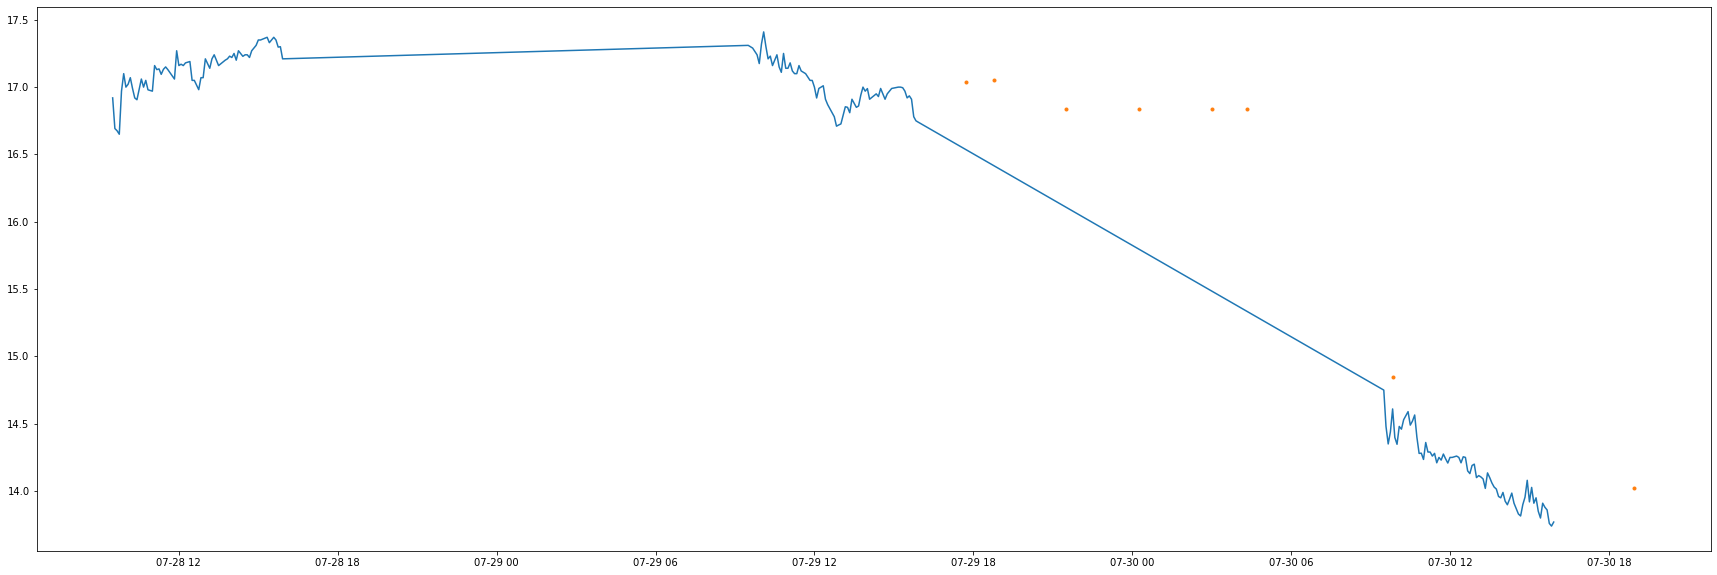

In [63]:
plot_article_costs( hist, atricle_date )

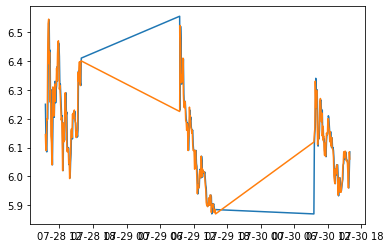

In [30]:
# plt.plot( plot_time, np.full( len(plot_time), hist['Open'].mean() ), color="white" );
plt.plot( hist.index, hist['Open'])
plt.plot( hist.index, hist['Close']);

# Article scraping

    decoder
https://meyerweb.com/eric/tools/dencoder/
    
    decode url news
    MSFT
https://www.wsj.com/market-data/quotes/MSFT?id={"ticker":"msft","countryCode":"US","exchange":"","type":"STOCK","path":"/msft"}&type=quotes_latestNews
https://www.wsj.com/market-data/quotes/MSFT?id=%7B%22ticker%22%3A%22msft%22%2C%22countryCode%22%3A%22US%22%2C%22exchange%22%3A%22%22%2C%22type%22%3A%22STOCK%22%2C%22path%22%3A%22%2Fmsft%22%7D&type=quotes_latestNews

    page msft
https://www.wsj.com/market-data/quotes/MSFT

https://www.barrons.com/quote/stock/tal
news-columns class

https://hercules-api.investorsobserver.com/api/stock/tal?comment=stockDetailPage%2FloadStockData

    offset вторая порция
https://hercules-apiv2.investorsobserver.com/api/wp/posts?
            filter[category_name]=mtnewswire,,,,
            morning-update,stocks-to-watch,featured,investorskeyhole,market-updates,market-week-ahead,investing,
            personal-finance,week-in-review&filter[tag]=&filter[symbols]=TAL&per_page=5&offset=5
            
    headers
Accept: application/json, text/plain, */*
Referer: https://www.investorsobserver.com/
sec-ch-ua: " Not;A Brand";v="99", "Google Chrome";v="91", "Chromium";v="91"
sec-ch-ua-mobile: ?0
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36

headers = { 'Accept':'*/*',
    'Accept-Encoding':'gzip, deflate, sdch',
    'Accept-Language':'en-US,en;q=0.8',
    'Cache-Control':'max-age=0',
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/48.0.2564.116 Safari/537.36' }

for key in headers:
    webdriver.DesiredCapabilities.PHANTOMJS['phantomjs.page.customHeaders.{}'.format(key)] = headers[key]

In [ ]:
def htmltotext(text):
    # break into lines and remove leading and trailing space on each
    lines = (line.strip() for line in text.splitlines())
    # break multi-headlines into a line each
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    # drop blank lines
    text = '\n'.join(chunk for chunk in chunks if chunk)
    return text

In [ ]:
def some_actions( browser ):
    
    step = random.randint( 15,25 )
    bias = 50
    
    for i in range (400,600, step):
        
        if i > 480+step:
            browser.execute_script("window.moveTo({},{})".format(step+2, step)) 
        
        time.sleep(0.2)
        browser.execute_script("window.scrollTo(0, {})".format(bias+i)) 

In [ ]:
def query_url(url, browser, wait_time=None):
    
    if wait_time != None:
        browser.set_page_load_timeout(wait_time)

    try:
        browser.get(url)
        some_actions( browser )
        cookies = browser.get_cookies()
        # browser.delete_all_cookies()
        for cookie in cookies:
            browser.add_cookie(cookie)
    except Exception as e:
        if "timeout:" not in str(e):
            print( str(e), wait_time )
            
    html = browser.page_source
    html = html.replace( "\\", "" )
    return html

In [ ]:
from selenium import webdriver
import json
from bs4 import BeautifulSoup

# browser = webdriver.PhantomJS( executable_path = "C:\\Phantomjs\\bin\\phantomjs")
# browser.set_window_size(2048, 1600)
# set_cookie( "wsj.com_cookies.txt", browser )
# set_cookie( "bloomberg.com_cookies.txt", browser )

browser = webdriver.Chrome(  executable_path = "C:\\Chrome\\chromedriver" )

In [ ]:
def get_news_url_for_company_name( company_name ):
    # Get news hrefs
    url = '''https://www.wsj.com/market-data/quotes/{}?id=%7B%22ticker%22%3A%22{}%22%2C%22countryCode%22%3A%22US%22%2C%22exchange%22%3A%22%22%2C%22type%22%3A%22STOCK%22%2C%22path%22%3A%22%2F{}%22%7D&type=quotes_latestNews'''.format( company_name.upper() , company_name, company_name )
    browser.get(url)
    html = browser.page_source

    # delete html tags from string
    res = '''{"id"''' + html.split('''>{"id"''')[1]
    res = res.split('''"}<''')[0] + '''"}'''
    data = json.loads( res )

    headlines    = []
    urls         = []
    time         = []
    atricle_date = []

    for index, article in enumerate( data['data']['news']['articles'] ):
        # if, the article has a url, and our hedaline is not a advertising
        if 'url' in article and "Thinking about buying stock" not in article['headline'] :
            headlines.append( article['headline'] )
            urls.append( article['url'] )
            time.append( article['datetime'] )
            atricle_date.append( article['articleDate'] )
            
    return headlines, urls, time, atricle_date

In [ ]:
headlines, urls, time, atricle_date = get_news_url_for_company_name( company_name )

In [ ]:
def get_articles_texts( urls, article_content_dict, err_articles, browser ):
    
    for url in urls:

        article_content = ""
        wait_time = 0.5

        print( url )
        for try_cnt in range(1,5):

            try:
                browser.set_page_load_timeout(wait_time)
                browser.get(url)
            except Exception as e:
                if "Error: 'timeout" not in str(e):
                    print( str(e), wait_time )

            html = browser.page_source
            soup = BeautifulSoup(html, 'html.parser')

            if "www.wsj.com" in url:
                article_content = soup.find( "div", attrs={"class" : "article-content"} )
            if "www.barrons.com" in url :
                article_content = soup.find( "div", attrs={"class" : "paywall"} )
            if "www.marketwatch.com" in url :
                article_content = soup.find( "div", attrs={"class" : "paywall"} )

            # if article_content is None, increaze time wait a continue
            if article_content == None :
                wait_time += 1.5
                continue
            else:
                break
        # if after increazing time wait, article_content is not None, continue to next url
        if article_content == None :
            err_articles.append( url )
            print( "err", url)
            continue

        # get text from html
        text = htmltotext( article_content.get_text() )

        article_content_dict[url] = text
        
    browser.set_page_load_timeout(20)

In [ ]:
article_content_dict = {}

In [ ]:
err_articles = []
get_article_texts( urls , article_content_dict, err_articles, browser)

In [ ]:
for key, value in article_content_dict.items():
    print( len(value) )

In [ ]:
from IPython.core.display import display, HTML
display(HTML(html))

class name or item id for each web-site

marketwatch
js-article__body id
paywall class

barronsstrftime
paywall class

wst
article-content  

businesswire
bw-release-story

# Article scraping from all newspaper

https://www.bloomberg.com/
https://www.cnbc.com/
https://www.thomsonreuters.com/
https://seekingalpha.com/

In [ ]:
def get_articles_href( urls, article_content_dict, err_articles, browser ):
    
    for url in urls:

        article_urls = ""
        wait_time = 0.5

        for try_cnt in range(1,5):

            try:
                browser.set_page_load_timeout(wait_time)
                browser.get(url)
            except Exception as e:
                if "Error: 'timeout" not in str(e):
                    print( str(e), wait_time )

            html = browser.page_source
            soup = BeautifulSoup(html, 'html.parser')

            if "www.wsj.com"         in url:
                article_urls = soup.find( "div", attrs={"class" : "article-content"} )
            if "www.barrons.com"     in url :
                article_urls = soup.find( "div", attrs={"class" : "paywall"} )
            if "www.marketwatch.com" in url :
                article_urls = soup.find( "div", attrs={"class" : "paywall"} )
            if "www.bloomberg"       in url :
                article_urls = soup.find_all( "a", attrs={"class" : "story-list-story__info__headline-link"} )

            # if article_content is None, increaze time wait a continue
            if article_content == None :
                wait_time += 1.5
                continue
            else:
                break
        # if after increazing time wait, article_content is not None, continue to next url
        if article_content == None :
            err_articles.append( url )
            print( "err", url)
            continue

        # get text from html
        text = htmltotext( article_content.get_text() )

        article_content_dict[url] = text
        
    browser.set_page_load_timeout(20)

In [ ]:
browser.refresh()

In [ ]:
browser.set_page_load_timeout(10)

In [ ]:
query_url(query_url, browser)

In [ ]:
html = browser.page_source
html = html.replace( "\\", "" )
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
source_url = "https://www.bloomberg.com"
articles = soup.find_all( "a", attrs={"class" : "story-list-story__info__headline-link"} )

articles_url_name = {}
for article in articles:
    href = source_url + article['href']
    articles_url_name[ href ] = article.get_text()

In [ ]:
query_url = list( articles_url_name.keys() )[0]
query_url(query_url, browser)

In [ ]:
html = browser.page_source
html = html.replace( "\\", "" )
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
soup.find_all( attrs={"class" : "body-copy-v2"} )

In [ ]:
soup.find_all( "p", attrs={"class" : "paywall"} )

In [ ]:
import pyautogui
import time

pyautogui.size()

In [ ]:
action  = webdriver.ActionChains(browser)

# Text visualization

In [ ]:
# from sklearn.manifold import TSNE

In [ ]:
import pyautogui
import time

def confirm_not_robot():
    
    screenWidth, screenHeight = pyautogui.size() # Get the size of the primary monitor.
    
    clickToX = screenWidth/2 - 100
#     480
    clickToY = [ 320]
    
    turnX = 1804
    turnY = 11
    
    for y in clickToY:
        
        pyautogui.moveTo( clickToX, y )

        pyautogui.mouseDown();
        time.sleep( 6 )
        pyautogui.mouseUp()
        
        #  move and turn all open pages        
        pyautogui.moveTo( turnX, turnY )
        pyautogui.click()
        pyautogui.click()
        pyautogui.click()

#     currentMouseX, currentMouseY = pyautogui.position() # Get the XY position of the mouse.